## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

Для начала посмотрим на каждый файл в отдельности: выведем на экран общую информацию и первые пять строк, чтобы увидеть названия столбцов.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
try:
    data_1 = pd.read_csv('/datasets/mkrf_movies.csv')
    data_1.info()
    display(data_1.head())
except FileNotFoundError:
    print('Указан неверный путь к файлу')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [2]:
try:
    data_2 = pd.read_csv('/datasets/mkrf_shows.csv')
    data_2.info()
    display(data_2.head())
except FileNotFoundError:
    print('Указан неверный путь к файлу')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


Метод .info() показал, что в первом датафрейме **7486** строк и **15** столбцов, а во втором - **3158** строк и **2** столбца. Общим для обоих датафреймов является столбец `puNumber`, в котором содержатся номера прокатного удостоверения для каждого фильма. По этому столбцу можно объединить две таблицы в одну. Однако, тип данных в столбце в обеих таблицах различается. Номер прокатного удостоверения в первой таблице имеет тип **object**, значит, в столбце содержатся строки. Создадим функцию для нахождения строковых значений в столбце.

In [3]:
def check_int (value):
    try:
        int(value)
        return True
    except:
        return False

Применим функцию и выведем на экран результат:

In [4]:
data_1['puNumber_int'] = data_1['puNumber'].apply(check_int)
data_1.query('puNumber_int == False')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,puNumber_int
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,False


Функция вывела на экран только одну строку. Для фильма в этой строке вместо номера прокатного удостоверения записано слово "нет". Учитывая, что общее количество фильмов - более 7400, можно удалить эту строку из датафрейма, т.к. тип **object** будет мешать объединению двух таблиц по номеру удостоверения. К тому же, у этого фильма нет данных о гос. поддержке. Затем заменим тип данных в столбце `puNumber` на **int**.

In [6]:
data_1 = data_1.query('puNumber != "нет"')
data_1['puNumber'] = data_1['puNumber'].astype('int')
display(data_1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  puNu

None

In [7]:
data = data_1.merge(data_2, on='puNumber', how='outer')
display(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  puNu

None

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,puNumber_int,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",True,NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",True,NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",True,NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",True,NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",True,NaN


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  puNu

Замене подлежит тип данных в столбце `show_start_date`: необходимо преобразовать его в **datetime** для дальнейшей работы. Также следует зменить тип данных в столбце `ratings` на **float**.

Для начала разберемся с датами премьеры:

In [9]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

Далее посмотрим, почему столбец `ratings` имеет строковый тип:

In [10]:
data.ratings.unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Видно, что данные записаны и дробными числами, и процентами. Необходимо привести все данные в столбце к одному виду. Для начала уберём знак **%** из значений, а затем приведём весь стролбец к типу **float**.

In [11]:
data['ratings'] = data['ratings'].str.replace('%', '')

In [12]:
data['ratings'] = data['ratings'].astype('float')
data['ratings'].unique() # Проверяем, что получилось

array([ 7.2,  6.6,  6.8,  7.7,  8.3,  8. ,  7.8,  8.1,  7.1,  6. ,  7.4,
        5.8,  8.7,  6.3,  6.9,  5. ,  4.3,  7.3,  7. ,  6.4,  nan,  8.2,
        7.5,  6.7,  7.9,  5.9,  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,
        8.5,  8.8,  5.5,  5.1,  5.7,  5.4, 99. ,  4.4,  4.5,  5.3,  4.1,
        8.4,  2.6,  3.8,  4.6,  4.8,  4. ,  3. ,  1.6,  4.2,  5.2,  4.7,
        4.9,  3.9,  2.7,  3.3,  2.9, 28. ,  3.7,  1.4,  3.1, 97. ,  3.5,
        3.2,  2.8,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6, 83. , 64. ,
       91. , 94. , 62. , 79. , 90. , 19. , 88. ,  1. , 89. ,  1.3,  1.9,
        1.8,  1.2,  1.7,  9. , 98. ,  8.9,  9.1])

Можно заметить, что столбец теперь содержит значения, большие чем 10 (те, которые имели ранее знак %). Напишем функцию, которая будет делить такие оценки на 10, чтобы привести весь столбец к общему виду оценок по 10-ти бальной шкале.

In [13]:
def funq (value):
    if value > 10: return value / 10
    else: return value

In [14]:
data['ratings'] = data['ratings'].apply(funq)
data['ratings'].unique() # Проверка

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

Типы данных в столбцах `show_start_date` и `ratings` успешно заменены.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Изучим процент пропусков по столбцам во всем датафрейме:

In [15]:
pd.DataFrame(round((data.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.240000
production_country,0.030000
director,0.120000
producer,7.590000
age_restriction,0.000000
refundable_support,95.560000


Сильно выделяются столбцы с объемами гос. поддержки: ее не было у 95% фильмов. Также, скорее всего, у этих же фильмов отсутствуют данные об общем бюджете. Эти пропуски заменить не представляется возможным.

Колонки с процентом пропусков менее 1 трогать не будем, т.к. влияние на общий объем данных эти пропуски оказывают незначительное. Со столбцом `ratings` ничего не сделать - пропуски в нём нельзя заполнять значениями, т.к. мы не можем знать о зависимости появления этих пропусков.

Столбец со сборами `box_office` имеет больше половины пропусков. Сделать с ними ничего не получится, и для задачи проекта это не требуется.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [16]:
print('Количество дубликатов в таблице:', data.duplicated().sum())

Количество дубликатов в таблице: 0


Полных дубликатов в таблице нет. Проверим дубликаты по названиям фильмов:

In [17]:
data['title'].value_counts().head(20)

День святого Валентина_                                        5
Дитя тьмы                                                      4
Белая мгла /По комиксу Грега Рукка и Стива Либера/             4
Безумцы                                                        4
Начало_                                                        4
Дом грёз                                                       4
Жена путешественника во времени                                4
Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/    4
Рапунцель: Запутанная история                                  4
Химера                                                         4
Знакомство с Факерами 2.                                       4
Не брать живым /По книге Раджива Чандрасекарана/               4
Прощание                                                       4
Шерлок Холмс                                                   4
Дорога /По новелле Кормака МкКарфи/                            4
Кошмар на улице Вязов /Фи

Названия фильмов повторяются, но, учитывая, что полных дубликатов в таблице нет, можно предположить, что это могут быть ремейки фильмов с тем же названием, выпущенные в другом году. Либо это могут быть одинаковые фильмы, выпущенные в одно время, но в разных странах и поэтому имеющие разные номера прокатных удостоверений. В таком случае это все равно разные картины с точки зрения анализа, ведь они могут быть оценены по-разному в каждой стране.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

In [18]:
data.info() # Взглянем еще раз на общую информацию

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Категориальными столбцами являются те, которые на данный момент имеют тип **object**.  Создадим список с названиями столбцов с категориальными значениями:

In [19]:
list_of_names = data.select_dtypes(include=['object']).columns.tolist()
list_of_names

['title',
 'type',
 'film_studio',
 'production_country',
 'director',
 'producer',
 'age_restriction',
 'financing_source',
 'genres']

In [20]:
def func (list): # Напишем функцию для вывода на экран уникальных значений в каждом столбце
    for name in list:
        display('Столбец', name)
        display(data[name].value_counts())
        display('Количество уникальных значений:', len(data[name].unique()))
        
func(list_of_names) # Применим функцию    

'Столбец'

'title'

День святого Валентина_                               5
Дитя тьмы                                             4
Белая мгла /По комиксу Грега Рукка и Стива Либера/    4
Безумцы                                               4
Начало_                                               4
                                                     ..
МУЛЬТ в кино. Выпуск № 10                             1
По следам ЧЕРНОЙ КОШКИ                                1
Небесный суд.                                         1
Горько в Мексике                                      1
Непрощенный                                           1
Name: title, Length: 6771, dtype: int64

'Количество уникальных значений:'

6771

'Столбец'

'type'

Художественный                4519
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

'Количество уникальных значений:'

8

'Столбец'

'film_studio'

Киностудия "Мосфильм"                                                                                                                                                                                                       341
ООО "Мульт в кино"                                                                                                                                                                                                           57
Анимаккорд Лтд                                                                                                                                                                                                               23
ООО "Мульт в кино"                                                                                                                                                                                                           18
ФГУП "ТПО "Киностудия "Союзмультфильм"                                                                  

'Количество уникальных значений:'

5491

'Столбец'

'production_country'

США                                 2172
Россия                              1820
СССР                                 347
Франция                              301
Великобритания                       257
                                    ... 
США - Германия - Япония                1
Великобритания - Чехия - Франция       1
Франция - Чехия - Бельгия              1
Франция, Бельгия, Люксембург           1
Испания - Канада                       1
Name: production_country, Length: 950, dtype: int64

'Количество уникальных значений:'

951

'Столбец'

'director'

О.Семёнова                                                         47
Стивен Содерберг                                                   17
Д.Червяцов                                                         17
Ридли Скотт                                                        16
Тиль Швайгер                                                       14
                                                                   ..
М.Карри, У.Киндрик, И.Пьятт, А.Рис, С.Роден, С.Сури, Н.Хартанто     1
Франк Манкузо                                                       1
Брайан О.Мэлли                                                      1
Тинатаин Каджришвили                                                1
Н.Пиотровский                                                       1
Name: director, Length: 4811, dtype: int64

'Количество уникальных значений:'

4812

'Столбец'

'producer'

П.Смирнов                                        67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина    28
С.Сельянов                                       18
Д.Ловейко, О.Кузовков                            17
Джерри Брукхаймер                                11
                                                 ..
Тодд Гарнер, Кевин Джеймс                         1
А.Дж.Дикс, Эван Голдберг, Барбара А.Холл          1
Энн-Мари Желина, Пьер Ивен, Мари-Клод Пулен       1
Ода Шефер, Дэниэл Баур, Дэниэл Бекерман           1
Андреа Блок, Кристиан Хаас                        1
Name: producer, Length: 5349, dtype: int64

'Количество уникальных значений:'

5350

'Столбец'

'age_restriction'

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1592
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

'Количество уникальных значений:'

5

'Столбец'

'financing_source'

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

'Количество уникальных значений:'

4

'Столбец'

'genres'

драма                         476
комедия                       352
мелодрама,комедия             222
драма,мелодрама,комедия       189
драма,мелодрама               183
                             ... 
комедия,семейный,музыка         1
драма,боевик,криминал           1
мультфильм,биография,драма      1
детектив,триллер,боевик         1
детектив,драма,триллер          1
Name: genres, Length: 742, dtype: int64

'Количество уникальных значений:'

743

Во всех столбцах значения выглядят нормальными, кроме столбца `title`. Рассмотрим детальнее.

In [21]:
data['title'].value_counts().head(20)

День святого Валентина_                                        5
Дитя тьмы                                                      4
Белая мгла /По комиксу Грега Рукка и Стива Либера/             4
Безумцы                                                        4
Начало_                                                        4
Дом грёз                                                       4
Жена путешественника во времени                                4
Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/    4
Рапунцель: Запутанная история                                  4
Химера                                                         4
Знакомство с Факерами 2.                                       4
Не брать живым /По книге Раджива Чандрасекарана/               4
Прощание                                                       4
Шерлок Холмс                                                   4
Дорога /По новелле Кормака МкКарфи/                            4
Кошмар на улице Вязов /Фи

В столбце замечены символы `_` и `.` в конце строки. Удалим такие символы из столбца и проверим, изменится ли количество уникальных значений.

In [22]:
data['title'] = data['title'].str.replace('_', '')
data['title'] = data['title'].str.replace('.', '')
display(data['title'].value_counts())
display('Количество уникальных значений:', len(data['title'].unique()))

Волшебная страна                                                 5
День святого Валентина                                           5
Белая мгла /По комиксу Грега Рукка и Стива Либера/               4
Не брать живым /По книге Раджива Чандрасекарана/                 4
Король Лев                                                       4
                                                                ..
Ты и я навсегда                                                  1
Ларри Краун                                                      1
Три тенора: Лучано Паваротти, Пласидо Доминго и Хосе Каррерас    1
Человек - невидимка                                              1
Непрощенный                                                      1
Name: title, Length: 6697, dtype: int64

'Количество уникальных значений:'

6697

Было **6757**, стало **6697**. Значит, удаление символов `_` и `.` привело к устранению дубликатов.

В колонке `type` встречаются лишние пробелы в начале названий, что приводит к появлению дубликатов. Уберем лишние пробелы методом **.str.strip()**.

In [23]:
data['type'] = data['type'].str.strip()
data.type.unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Теперь категории не дублируются, проблемные начения поля `type` исправлены.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

 Создадим список с названиями столбцов с количественными значениями:

In [24]:
list_of_names_2 = data.select_dtypes(include=['int', 'float']).columns.tolist()
list_of_names_2

['puNumber',
 'refundable_support',
 'nonrefundable_support',
 'budget',
 'ratings',
 'box_office']

In [25]:
def display_func (values): # Напишем функцию для вывода на экран уникальных значений в каждом столбце
    for name in values:
        display('Столбец', name)
        display(data[name].value_counts())
        display('Количество уникальных значений:', len(data[name].unique()))
        
display_func(list_of_names_2) # Применим функцию   

'Столбец'

'puNumber'

221054410    2
221154310    2
122001411    1
111008518    1
114002716    1
            ..
221015415    1
121021814    1
224028210    1
121013618    1
126002916    1
Name: puNumber, Length: 7483, dtype: int64

'Количество уникальных значений:'

7483

'Столбец'

'refundable_support'

0.0            221
20000000.0      12
10000000.0      10
25000000.0      10
15000000.0       9
5000000.0        9
50000000.0       8
40000000.0       8
30000000.0       7
60000000.0       6
100000000.0      5
110000000.0      2
55000000.0       2
19000000.0       2
75000000.0       2
7153119.0        1
35000000.0       1
9000000.0        1
150000000.0      1
36000000.0       1
29000000.0       1
17000000.0       1
180000000.0      1
115000000.0      1
41000000.0       1
26000000.0       1
7000000.0        1
7346881.0        1
3500000.0        1
8000000.0        1
38000000.0       1
44000000.0       1
28000000.0       1
80000000.0       1
Name: refundable_support, dtype: int64

'Количество уникальных значений:'

35

'Столбец'

'nonrefundable_support'

25000000.0     53
30000000.0     48
35000000.0     29
40000000.0     26
20000000.0     19
               ..
31000000.0      1
29000000.0      1
138969465.0     1
3000000.0       1
25900000.0      1
Name: nonrefundable_support, Length: 75, dtype: int64

'Количество уникальных значений:'

76

'Столбец'

'budget'

0.0            17
38000000.0      6
80000000.0      4
50000000.0      4
40000000.0      3
               ..
49280496.0      1
56693559.0      1
57166797.0      1
109814241.0     1
42252509.0      1
Name: budget, Length: 290, dtype: int64

'Количество уникальных значений:'

291

'Столбец'

'ratings'

6.6    312
6.7    308
6.8    261
7.2    252
6.2    244
      ... 
1.8      1
9.2      1
1.2      1
1.0      1
1.3      1
Name: ratings, Length: 84, dtype: int64

'Количество уникальных значений:'

85

'Столбец'

'box_office'

0.0            24
200.0          13
300.0          12
360.0           9
400.0           8
               ..
9585014.0       1
809638458.6     1
220728.0        1
11332412.0      1
52984377.0      1
Name: box_office, Length: 2938, dtype: int64

'Количество уникальных значений:'

2939

Обнаружены следующие подозрительные данные:
- в столбце `puNumber` повторяются уникальные номера удостоверений. Таких случаев мало, так что далее изучим строки с этими номерами;


- в столбце `budget` есть 17 фильмов с нулевым бюджетом;


- в столбце `box_office`встречаются как нулевые сборы, так и слишком маленькие значения (200, 300, 360 и т.д.) по сравнению с более крупными остальными. Возможно, данные о сборах записаны в других единицах(валюте).

In [26]:
data.query('puNumber == 221054410') # Проверим первый повторяющийся номер

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,puNumber_int,box_office
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",True,NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",True,NaN


Заметно, что это два разных фильма. Один является продолжением другого. Изучив информацию, можно узнать, что первый вышел в 1999 году, а второй в 2002, но по данным таблицы оба они вышли в прокат, видимо, в России, в один день и в один год.

In [27]:
data.query('puNumber == 221154310') # Проверим второй повторяющийся номер

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,puNumber_int,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",True,NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",True,NaN


Под этим номером находятся два совершенно разных фильма, не связанные друг с другом. Они также вышли в прокат в один и тот же год и день.

Можно было бы заменить повторяющийся номер в обоих случаях на другой, который еще не встречается в таблице, но для текущего исследования это не так важно, поэтому оставим все без изменений.

Рассмотрим связь столбцов `budget`, `refundable_support` и `nonrefundable_support`.

In [28]:
budget_data = data.loc[:, 'refundable_support':'budget'].query('budget.isna() == False')
budget_data.head(30)

,refundable_support,nonrefundable_support,budget
1281,0.0,26500000.0,79411900.0
1448,0.0,26000000.0,37142857.0
1498,0.0,107847945.0,176023490.0
1524,0.0,28000000.0,40574140.0
1792,0.0,25000000.0,40015122.0
1853,0.0,25000000.0,51850000.0
1869,50000000.0,100000000.0,220588394.0
1870,0.0,46502299.0,86210067.0
1902,0.0,75000000.0,139551503.0
1911,0.0,34000000.0,48571430.0


Чаще встречаются фильмы, не имеющие возвратных средств гос. поддержки. Также заметно, что бюджет всегда превышает объём гос. поддержки.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [29]:
data['year'] = data['show_start_date'].dt.year
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,puNumber_int,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",True,NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",True,NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",True,NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",True,NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",True,NaN,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

Для выполнения этой задачи воспользуемся методом **.str.split()**. Он будет создавать из каждой строки список с помощью разделителя (а это во всех случаях запятая), а затем "доставать" из этого списка первый элемент и заносить в новый столбец. Данное решение занимает всего 2 строчки кода.

In [30]:
data['main_genre'] = data['genres'].str.split(',').str[0]
data['main_director'] = data['director'].str.split(',').str[0]
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,puNumber_int,box_office,year,main_genre,main_director
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",True,NaN,2015,боевик,Кевин Костнер
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",True,NaN,2016,драма,Е.Матвеев
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",True,NaN,2016,фантастика,Тимур Бекмамбетов
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",True,NaN,2016,фантастика,Тимур Бекмамбетов
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",True,NaN,2015,фантастика,Тимур Бекмамбетов


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Посчитаем долю государственной поддержки и добавим результаты в новый столбец `perc_support`.

In [31]:
data['perc_support'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']
data.query('perc_support.isna() == False').head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,puNumber_int,box_office,year,main_genre,main_director,perc_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,79411900.0,Министерство культуры,8.1,"драма,мелодрама",True,365353.6,2013,драма,А.Атанесян,0.333703
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,37142857.0,Министерство культуры,NaN,NaN,True,28140.0,2014,NaN,А.Якимчук,0.700000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,176023490.0,Фонд кино,5.3,"комедия,фантастика",True,19957031.5,2013,комедия,Р.Давлетьяров,0.612691
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,40574140.0,Министерство культуры,4.2,драма,True,55917.5,2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),0.690095
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,40015122.0,Министерство культуры,6.4,драма,True,232100.0,2014,драма,М.Угаров,0.624764
1853,Тайна Сухаревой башни Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.0,...,51850000.0,Министерство культуры,6.1,"мультфильм,фэнтези,история",True,15078858.6,2015,мультфильм,С.Серегин,0.482160
1869,А зори здесь тихие,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,50000000.0,...,220588394.0,Фонд кино,8.5,"драма,военный,история",True,249166767.7,2015,драма,Р.Давлетьяров,0.680000
1870,Две женщины,111013714,2014-10-02 12:00:00+00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.0,...,86210067.0,"Министерство культуры, Фонд кино",6.7,драма,True,4731239.5,2014,драма,В.Глаголева,0.539407
1902,Призрак,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.0,...,139551503.0,Фонд кино,7.0,"триллер,боевик,приключения",True,352804320.4,2015,триллер,А.Войтинский,0.537436
1911,Ведьма,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.0,...,48571430.0,Министерство культуры,7.4,"фэнтези,приключения,драма",True,51907.5,2015,фэнтези,Д.Федоров,0.700000


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Построим гистограмму, на которой покажем количество вышедших в прокат фильмов за каждый год:

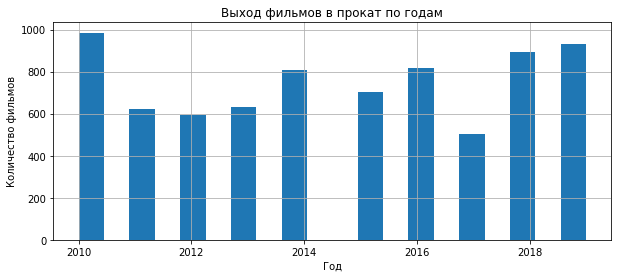

In [32]:
import matplotlib.pyplot as plt
data.hist('year', bins=20, figsize=(10,4))
plt.title('Выход фильмов в прокат по годам')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.show()

In [33]:
table_for_graph = data.pivot_table(index='year', values='puNumber', aggfunc='count').reset_index()
table_for_graph

,year,puNumber
0,2010,985
1,2011,622
2,2012,593
3,2013,630
4,2014,806
5,2015,705
6,2016,818
7,2017,505
8,2018,891
9,2019,930


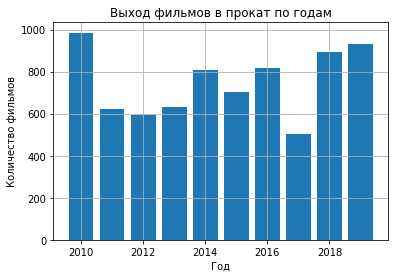

In [34]:
plt.bar(table_for_graph.year, table_for_graph.puNumber)
plt.title('Выход фильмов в прокат по годам')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.grid()
plt.show()

По графику видно, что больше всего фильмов вышло в **2010** году (почти 1000), чуть меньше - в **2018** и **2019**. Меньше всего фильмов вышло в **2017** году (около 500).

Выведем на экран долю фильмов, которые были в прокате. Для этого разделим число прокатных удостоверений из таблицы с данными о прокате в РФ на число прокатных удостоверений из первой таблицы, а также применим форматирование для отображения процентов.

In [35]:
display('Доля фильмов с информацией о прокате в кинотеатрах: {:.2%}'.format(data_2['puNumber'].count()/data_1['puNumber'].count()))

'Доля фильмов с информацией о прокате в кинотеатрах: 42.19%'

In [36]:
with pd.option_context('display.float_format', '{:.2%}'.format):
    display((data[['year','box_office']].groupby('year').apply(lambda x : x['box_office'].apply(pd.notna).mean())).to_frame().rename(columns={0 : 'доля информации о сборах'}))

,доля информации о сборах
year,
2010,10.66%
2011,17.52%
2012,21.59%
2013,29.21%
2014,34.62%
2015,65.96%
2016,64.30%
2017,70.69%
2018,53.31%


In [38]:
test = pd.DataFrame([a_1, a_2, a_3, a_4, a_5, a_6, a_7, a_8, a_9, a_10], [b_1, b_2, b_3, b_4, b_5, b_6, b_7, b_8, b_9, b_10]).reset_index()
test.rename(columns={'index': 'total_films', 0: 'in_cinemas'}, inplace=True)
test['perc_films'] = test['in_cinemas'] / test['total_films'] * 100
test['year'] = table_for_graph['year']
test

,total_films,in_cinemas,perc_films,year
0,985,105,10.659898,2010
1,622,109,17.524116,2011
2,593,128,21.585160,2012
3,630,184,29.206349,2013
4,806,279,34.615385,2014
5,705,465,65.957447,2015
6,818,526,64.303178,2016
7,505,357,70.693069,2017
8,891,475,53.310887,2018
9,930,530,56.989247,2019


In [39]:
test = (data[['year','box_office']].groupby('year').apply(lambda x : x['box_office'].apply(pd.notna).mean())).to_frame() \
.rename(columns={0 : 'perc_films'}).reset_index()

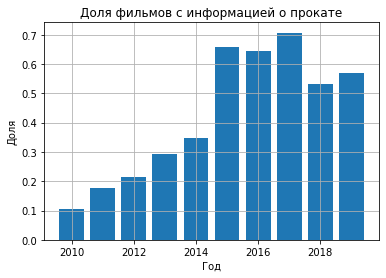

In [40]:
plt.bar(test.year, test.perc_films)
plt.title('Доля фильмов с информацией о прокате')
plt.xlabel('Год')
plt.ylabel('Доля')
plt.grid()
plt.show()

Видно, что доля фильмов с информацией о прокате росла с 2010 по 2017, затем немного упала к 2019 году.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Рассматривать будем ту часть данных, в которой имеется информация о сборах.

In [41]:
data_cut = data.query('box_office.isna() == False')

In [42]:
data_cut.box_office = data_cut.box_office.astype('float')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data_cut

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,puNumber_int,box_office,year,main_genre,main_director,perc_support
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,...,NaN,NaN,8.300,"мелодрама,комедия",True,2700.000,2013,мелодрама,В.Меньшов,NaN
18,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,...,NaN,NaN,8.000,"мелодрама,комедия",True,360.000,2016,мелодрама,Ю.Чулюкин,NaN
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,...,NaN,NaN,7.700,драма,True,420.000,2016,драма,В.Краснопольский,NaN
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,«6+» - для детей старше 6 лет,NaN,...,NaN,NaN,8.700,"комедия,мелодрама,криминал",True,380.000,2013,комедия,Л.Гайдай,NaN
38,Мужики!,111007213,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,NaN,«6+» - для детей старше 6 лет,NaN,...,NaN,NaN,8.100,драма,True,1165.000,2013,драма,И.Бабич,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.000,...,980000000.000,Фонд кино,6.000,"история,биография,драма",True,717703185.530,2019,история,А.Кравчук,0.510
7465,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.000,...,190000000.000,Фонд кино,6.700,"мультфильм,приключения,семейный",True,501069235.000,2019,мультфильм,Д.Шмидт,0.526
7470,Реальная любовь в Нью-Йорке,121038219,2019-12-19 12:00:00+00:00,Художественный,"Креатив Энлэйнс, Арт, Копенгаген Филм, Дет Дан...",Дания - Канада - Швеция - Франция - Германия -...,Лоне Шерфиг,"Малене Бленков, Сандра Каннингэм",«16+» - для детей старше 16 лет,NaN,...,NaN,NaN,6.100,драма,True,3143790.500,2019,драма,Лоне Шерфиг,NaN
7471,Черное Рождество,121038319,2019-12-19 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Блюмхауз Продакшнз, Дивид/К...",США - Новая Зеландия,Софи Такал,Джесси Хендерсон,«18+» - запрещено для детей,NaN,...,NaN,NaN,3.900,"ужасы,триллер,детектив",True,18001772.430,2019,ужасы,Софи Такал,NaN


In [43]:
data_cut.box_office.describe()

count         3158.000
mean      76478696.161
std      240353122.823
min              0.000
25%          86239.000
50%        2327987.550
75%       23979671.025
max     3073568690.790
Name: box_office, dtype: float64

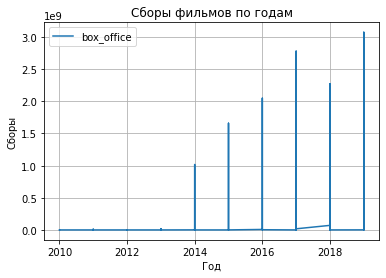

In [44]:
data_cut.sort_values(by='year').plot(x='year', y='box_office', grid=True)
plt.title('Сборы фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Сборы')
plt.show()

In [45]:
table_for_graph_2 = pd.pivot_table(data, index='year', values='box_office', aggfunc='sum').reset_index()
table_for_graph_2

,year,box_office
0,2010,2428654.000
1,2011,14102765.000
2,2012,6955423.000
3,2013,29799706.200
4,2014,7444951859.200
5,2015,39497365196.400
6,2016,47866299741.910
7,2017,48563707217.510
8,2018,49668403134.320
9,2019,48425708779.590


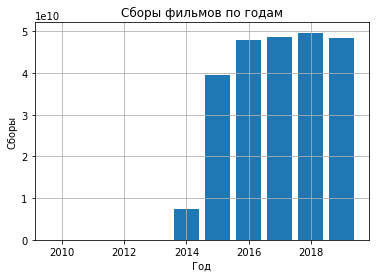

In [46]:
plt.bar(table_for_graph_2.year, table_for_graph_2.box_office)
plt.title('Сборы фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Сборы')
plt.grid()
plt.show()

По графику заметно, что фильмы до **2014** года собирали очень мало с проката, а после - сборы начали сильно расти. Самые большие сборы у фильмов в **2018** году.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [47]:
table = data_cut.sort_values(by='year').pivot_table(values='box_office', index='year', aggfunc=['mean','median'])
table

,mean,median
,box_office,box_office
year,,
2010,23130.038,1700.000
2011,129383.165,3000.000
2012,54339.242,5660.000
2013,161954.925,3522.500
2014,26684415.266,18160.000
2015,84940570.315,4920933.000
2016,91000569.852,3846679.410
2017,136032793.326,9968340.000


- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Создадим таблицу с колонками года выхода, возрастным ограничением и сборами за 2015 - 2019 года:

In [48]:
df = data_cut.query('year >= 2015')
df = df.loc[:, ['age_restriction' , 'box_office', 'year']]
df

,age_restriction,box_office,year
18,«6+» - для детей старше 6 лет,360.000,2016
19,«6+» - для детей старше 6 лет,420.000,2016
50,«16+» - для детей старше 16 лет,84720.000,2015
61,«6+» - для детей старше 6 лет,300.000,2015
64,«12+» - для детей старше 12 лет,67500.000,2015
...,...,...,...
7463,«12+» - для детей старше 12 лет,717703185.530,2019
7465,«6+» - для детей старше 6 лет,501069235.000,2019
7470,«16+» - для детей старше 16 лет,3143790.500,2019
7471,«18+» - запрещено для детей,18001772.430,2019


Затем создадим сводную таблицу для визуализации данных:

In [49]:
age_df = pd.pivot_table(df, index=['year', 'age_restriction'])
age_df

box_office
year age_restriction                                     
2015 «0+» - для любой зрительской аудитории   9719348.163
     «12+» - для детей старше 12 лет        186521671.355
     «16+» - для детей старше 16 лет         67667386.133
     «18+» - запрещено для детей             41153851.268
     «6+» - для детей старше 6 лет          164184893.800
2016 «0+» - для любой зрительской аудитории   3664118.260
     «12+» - для детей старше 12 лет        148834713.712
     «16+» - для детей старше 16 лет         91563453.526
     «18+» - запрещено для детей             44992912.708
     «6+» - для детей старше 6 лет          172187800.118
2017 «0+» - для любой зрительской аудитории  76532976.667
     «12+» - для детей старше 12 лет        191498235.626
     «16+» - для детей старше 16 лет        154917709.918
     «18+» - запрещено для детей             65656432.524
     «6+» - для детей старше 6 лет          268580936.572
2018 «0+» - для любой зрительской аудитории   6489800.422
     «12+» - для детей старше 12 лет        212944651.652
     «16+» - для детей старше 16 лет        105792322.737
     «18+» - запрещено для детей             48939025.146
     «6+» - для детей старше 6 лет          148602567.991
2019 «0+» - для любой зрительской аудитории   5915355.607
     «12+» - для детей старше 12 лет        149178809.102
     «16+» - для детей старше 16 лет         71648421.262
     «18+» - запрещено для детей             55310362.315
     «6+» - для детей старше 6 лет          158673440.134

Чтобы отобразить данные более наглядно, построим графики для каждого года:

In [50]:
age_df = age_df.reset_index()

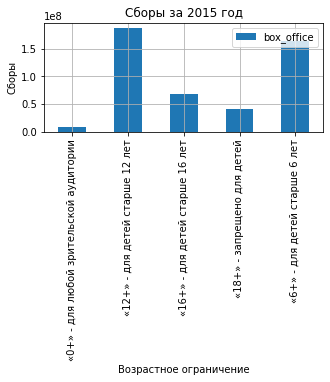

In [51]:
age_df.query('year == 2015').plot(x='age_restriction', y='box_office', kind='bar', figsize=(5,2), grid=True)
plt.title('Сборы за 2015 год')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Сборы')
plt.show()

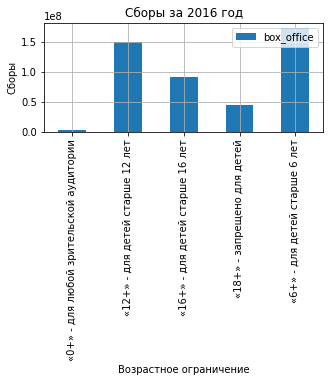

In [52]:
age_df.query('year == 2016').plot(x='age_restriction', y='box_office', kind='bar', figsize=(5,2), grid=True)
plt.title('Сборы за 2016 год')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Сборы')
plt.show()

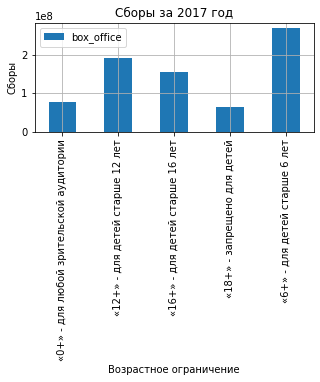

In [53]:
age_df.query('year == 2017').plot(x='age_restriction', y='box_office', kind='bar', figsize=(5,2), grid=True)
plt.title('Сборы за 2017 год')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Сборы')
plt.show()

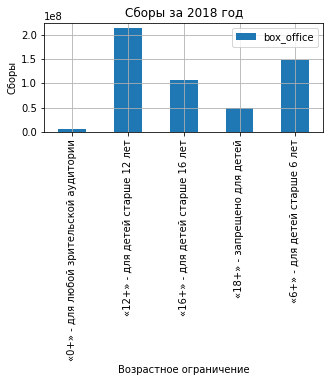

In [54]:
age_df.query('year == 2018').plot(x='age_restriction', y='box_office', kind='bar', figsize=(5,2), grid=True)
plt.title('Сборы за 2018 год')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Сборы')
plt.show()

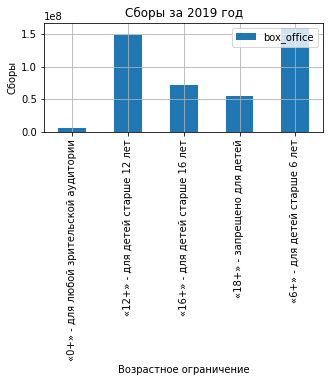

In [55]:
age_df.query('year == 2019').plot(x='age_restriction', y='box_office', kind='bar', figsize=(5,2), grid=True)
plt.title('Сборы за 2019 год')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Сборы')
plt.show()

<AxesSubplot:xlabel='year', ylabel='box_office'>

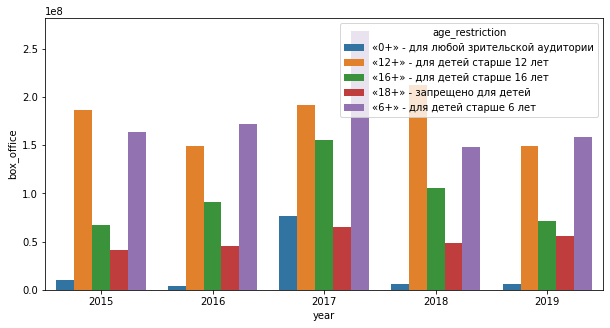

In [56]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(x='year', y='box_office', hue='age_restriction', data=age_df)

(0.0, 500000000.0)

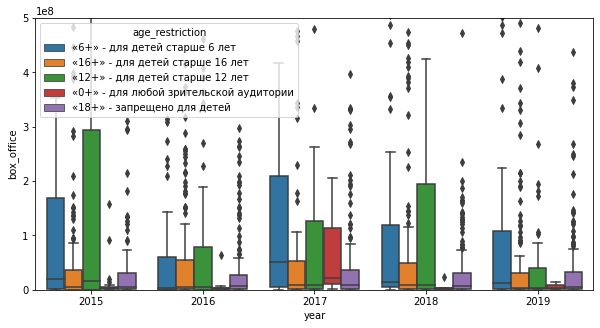

In [57]:
plt.figure(figsize=(10,5))
sns.boxplot(x='year', y='box_office', hue='age_restriction', data=df)
plt.ylim(0,5e8)

Анализируя данные, заметно, что самые большие сборы у фильмов с возрастным ограничением **6+** и **12+**. Это может быть связано с тем, что поход в кино на фильм с таким возрастным ограничением доступен большему числу людей, т.к. в кино могут пойти родители со своими детьми. В целом, по моему личному опыту, с детьми чаще ходят в кино, чем во взрослом возрасте. В таком случае, фильмы с ограничением 0+ не собрали такого количества денег потому, что их, скорее всего, выходило меньше. В зависимости от года картина остается почти неизменной.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Сначала создадим таблицу-срез с данными о фильмах, которые имели гос. поддержку.

In [58]:
data_supported = data.query('financing_source.isna() == False')
display(data_supported.info())
display(data_supported.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7477
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   puNumber               332 non-null    int64              
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    object             
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    object             
 6   director               332 non-null    object             
 7   producer               330 non-null    object             
 8   age_restriction        332 non-null    object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64        

None

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,puNumber_int,box_office,year,main_genre,main_director,perc_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.000,...,79411900.000,Министерство культуры,8.100,"драма,мелодрама",True,365353.600,2013,драма,А.Атанесян,0.334
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.000,...,37142857.000,Министерство культуры,NaN,NaN,True,28140.000,2014,NaN,А.Якимчук,0.700
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.000,...,176023490.000,Фонд кино,5.300,"комедия,фантастика",True,19957031.500,2013,комедия,Р.Давлетьяров,0.613
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.000,...,40574140.000,Министерство культуры,4.200,драма,True,55917.500,2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),0.690
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.000,...,40015122.000,Министерство культуры,6.400,драма,True,232100.000,2014,драма,М.Угаров,0.625


Добавим столбец с долей гос. поддержки от общего бюджета фильма.

In [59]:
data_supported['perc_support'] = (data_supported['refundable_support'] + data_supported['nonrefundable_support']) / data_supported['budget'] * 100
display(data_supported['perc_support'].describe())
display(data_supported['perc_support'].value_counts())

count   332.000
mean        inf
std         NaN
min       4.404
25%      38.462
50%      61.404
75%      66.141
max         inf
Name: perc_support, dtype: float64

inf       17
64.935     6
70.000     5
65.789     5
50.000     5
          ..
62.000     1
33.048     1
44.308     1
23.635     1
66.622     1
Name: perc_support, Length: 282, dtype: int64

В столбце появилось 17 значений `inf`. Это может означать, что в 17 случаях происходит деление на ноль, т.к. у фильмов указан нулевой бюджет. Рассмотрим подробнее:

In [60]:
data_supported.query('budget == 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,puNumber_int,box_office,year,main_genre,main_director,perc_support
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.000,...,0.000,"Министерство культуры, Фонд кино",6.600,мелодрама,True,10234016.100,2014,мелодрама,А.Зайцев,inf
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.000,...,0.000,Фонд кино,6.600,драма,True,446163511.000,2015,драма,Р.Прыгунов,inf
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.000,...,0.000,Фонд кино,7.800,"боевик,драма,криминал",True,196572438.400,2015,боевик,А.Андрианов,inf
2531,Бармен,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.000,...,0.000,Фонд кино,6.200,"комедия,фэнтези",True,67418974.800,2015,комедия,Д.Штурманова,inf
2614,Савва Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.000,...,0.000,Фонд кино,4.600,"мультфильм,приключения,фэнтези",True,184487551.400,2015,мультфильм,М.Фадеев,inf
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.000,...,0.000,Фонд кино,6.300,"комедия,драма",True,1957738.510,2015,комедия,М.Местецкий,inf
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.000,...,0.000,Фонд кино,5.100,"комедия,мелодрама",True,72937783.200,2015,комедия,С Чекалов,inf
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.000,...,0.000,Министерство культуры,4.300,комедия,True,15362931.430,2016,комедия,В.Ровенский,inf
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.000,...,0.000,Фонд кино,6.300,"комедия,мелодрама",True,70299052.000,2016,комедия,Д.Тюрин,inf
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.000,...,0.000,Фонд кино,5.600,фантастика,True,1038321489.000,2016,фантастика,Ф.Бондарчук,inf


Эти фильмы в некоторых случаях имеют данные об объемах гос.поддержки, но бюджет при этом был, скорее всего, не заполнен. Удалим строки с нулевым бюджетом:

In [61]:
data_supported = data_supported.drop(data_supported[data_supported.budget == 0].index)
data_supported['perc_support'].describe()

count   315.000
mean     51.739
std      17.004
min       4.404
25%      37.346
50%      59.226
75%      65.693
max      78.475
Name: perc_support, dtype: float64

По полученным данным видно, что средний объем гос. поддержки для фильмов - около **52%** от всего бюджета. Максимальный обьем поддержки - **78%**, минимальный - **4%**.

Рассмотрим, окупаются ли фильмы с гос. поддержкой. Для начала добавим столбец с общей суммой поддержки:

In [62]:
data_supported['total_support'] = data_supported['refundable_support'] + data_supported['nonrefundable_support']

Затем рассмотрим с помощью сводной таблицы сумму сборов и сумму бюджетов за каждый год:

In [63]:
df_1 = data_supported[['total_support', 'box_office', 'year', 'budget']]
pd.pivot_table(df_1, index=['year'], aggfunc='sum')

,box_office,budget,total_support
year,,,
2013,20322385.100,255435390.000,134347945.000
2014,1007188150.500,1279484783.000,549002299.000
2015,4815747420.830,7309669207.000,3227241459.000
2016,4957724366.670,7228942748.000,3977155482.000
2017,10759515337.200,6972172568.000,3098971662.000
2018,9517657281.130,6651694634.000,3098000000.000
2019,8262020628.120,12542866609.000,4724000000.000


Отчетливо видно, что фильмы с гос. поддержкой в общем не окупались ни в один год с 2013 по 2019. Взглянем на средний рейтинг этих фильмов:

In [64]:
df_2 = data_supported[['year', 'ratings']]
pd.pivot_table(df_2, index=['year'])

,ratings
year,
2013,6.700
2014,5.964
2015,6.143
2016,5.693
2017,6.054
2018,6.042
2019,6.176


В среднем, рейтинги фильмов с гос. поддержкой не превышают 6.7. Самые высокие рейтинги были у фильмов в 2013 году, самые низкие - в 2016.

### Шаг 5. Напишите общий вывод

В ходе проекта выявлено, что в российском прокате с 2015 по 2019 год больше всего зрителей, а, следовательно, денег, собрали картины с возрастным ограничением **6+** и **12+**. Фильмы с таким ограничением наиболее популярны у зрителей.

Большинство фильмов в российском прокате имели достаточный объем государственной поддержки, в среднем **52%** от общего бюджета картины. 

Также замечено, что ни в один год с 2013 по 2019 общий объем сборов не превысил объем денег, потраченных на производство фильма. К тому же, средний рейтинг фильмов с государственной поддержкой не превышал **6.7**, а по большей части находился около 6.0. Это неплохие результаты, но не отличные. Они означают, что российские фильмы не часто высоко оценивают, и этот результат с годами не изменился.